필요한 패키지를 가져옵니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.datasets import mnist

숫자 솔글씨 데이터셋을 불러옵니다. 

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train shape : ' + str(x_train.shape))
print('y_train shape : ' + str(y_train.shape))
print('x_test shape : ' + str(x_test.shape))
print('y_test shape : ' + str(y_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
x_train shape : (60000, 28, 28)
y_train shape : (60000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)


테스트할 샘플 하나를 살펴봅니다.

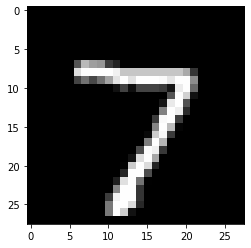

In [ ]:
plt.imshow(x_test[0], cmap='gray')

인공지능 모델이 이 이미지를 입력받았을 때, 해당하는 숫자를 출력할 수 있도록 만드는 것이 목표입니다. 우리는 y_test 라벨값도 가지고 있어서 바로 확인은 할 수 있으나, 모델 학습 시에는 사용이 되지 않으며, 시험 평가할 때만 사용됩니다.

In [ ]:
print(y_test[0])

7


그럼 모델 학습에 사용할 훈련셋의 이미지와 라벨을 확인해보겠습니다.

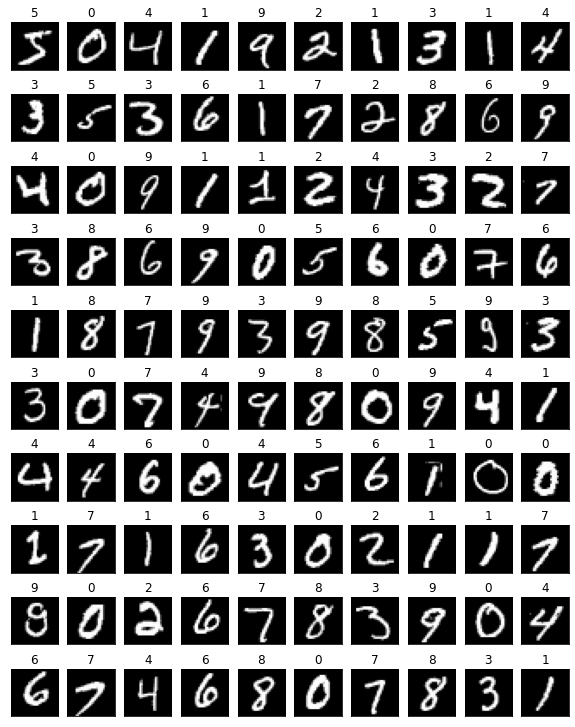

In [ ]:
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 13), 
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap = 'gray')
    ax.set_title(y_train[i])

plt.show()

모델 학습에 용이하도록 다음과 같이 데이터 전처리를 수행합니다.

*   데이터 전처리
    * 3차원(샘플수, 세로, 가로)를 2차원(샘플수, 벡터수)으로 변경
    * 정수를 실수로 변경
    * 0 ~ 255 사이의 수치를 0.0 ~ 1.0 사이로 정규화 수행
*   라벨 전처리
    * 0 ~ 9 라벨에 대한 원핫인코딩 수행 



In [ ]:
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

모델은 다음과 같이 구성하였습니다.

* 입력: 1차원의 784개 벡터
* 출력: 10개 벡터
* 출력층의 활성화 함수: 소프트맥스
* 손실함수: categorical_crossentropy
* 최적화기: adam
* 평가 메트릭: accuracy


In [ ]:
model = Sequential([
    Dense(64, input_dim=28*28, activation='relu'), 
    Dense(32, activation='relu'), 
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

모델 네트워크 아키텍처 구성을 그려보겠습니다.

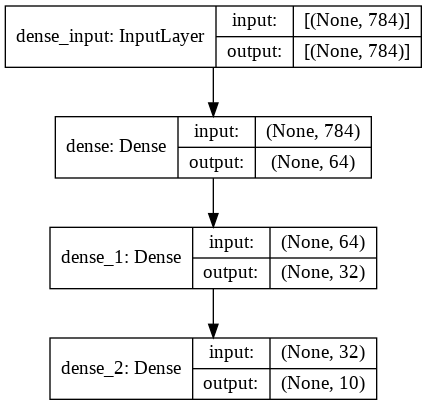

In [ ]:
plot_model(model, show_shapes=True)

준비된 훈련셋으로 모델을 학습시킵니다. fit()는 매 에포크에 해당하는 손실값과 평가 메트릭 수치를 반환합니다.

In [ ]:
hist = model.fit(x_train, y_train,
                 batch_size=32,
                 epochs=100)

Epoch 1/100
1875/1875 [==============================] - 7s 2ms/step - loss: 0.3089 - accuracy: 0.9104
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1381 - accuracy: 0.9590
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1018 - accuracy: 0.9693
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0821 - accuracy: 0.9744
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0678 - accuracy: 0.9791
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0569 - accuracy: 0.9819
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0489 - accuracy: 0.9848
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0427 - accuracy: 0.9863
Epoch 9/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0372 - accuracy: 0.9877
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - l

학습 시 매 에포크에 해당하는 훈련셋의 손실값과 평가 메트릭 수치를 시각화 하여 확인할 수 있습니다.

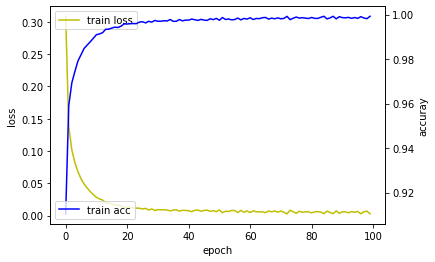

In [ ]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

에포크를 반복할수록 훈련셋의 손실값은 계속 낮아지는 것을 확인할 수 있습니다. 최종 학습된 모델로 평가를 수행합니다.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.3120 - accuracy: 0.9719
Test accuracy 0.9718999862670898
Test loss 0.312026709318161


또한 시험셋으로 테스트한 결과를 제출하기 위해 모델 결과 파일을 저장합니다. 출력이 10개 클래스에 해당하는 벡터이므로, 분류한 클래스 정보를 얻기 위해 가장 높은 값을 가진 인덱스 값을 가지고 옵니다. 이 인덱스가 클래스를 의미하며, 이 값을 파일로 저장합니다.

In [ ]:
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=-1)
np.savetxt('y_pred.csv', y_pred, fmt='%d')

훈련셋에만 적합된 모델 즉 오버피팅된 모델인지는 확인할 수가 없습니다. 다음 실습에서는 검증셋을 통해서 오버피팅을 모니터링하고, 오버피팅이 되기 전의 모델을 확보하는 방법에 대해서 알아보겠습니다.